<a href="https://colab.research.google.com/github/robindoering86/Project2-Kickstarter_success/blob/master/Kickstarter_Project_Success_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3. Kickstarter Project Success - Robin & Peter, Manuel & Simon


In recent years, the range of funding options for projects created by individuals and small companies has expanded considerably. In addition to savings, bank loans, friends & family funding and other traditional options, crowdfunding has become a popular and readily available alternative. 

Kickstarter, founded in 2009, is one particularly well-known and popular crowdfunding platform. It has an all-or-nothing funding model, whereby a project is only funded if it meets its goal amount; otherwise no money is given by backers to a project.
A huge variety of factors contribute to the success or failure of a project — in general, and also on Kickstarter. Some of these are able to be quantified or categorized, which allows for the construction of a model to attempt to predict whether a project will succeed or not. The aim of this project is to construct such a model and also to analyse Kickstarter project data more generally, in order to help potential project creators assess whether or not Kickstarter is a good funding option for them, and what their chances of success are.


# Project 2: Kickstarter Project Success

## Import libraries

In [1]:
# Pandas as NumPy
import pandas as pd
import numpy as np

# Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, roc_curve, confusion_matrix 

# Pyplot
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split


# Others
from os import listdir
import time
import pickle



## Read in the data

In [62]:
#from google.colab import drive
#drive.mount('/content/drive')

In [63]:
# For local execution
#base_path = './data/'

# For google colab execution
#base_path = '/content/drive/My Drive/Colab Notebooks/data/' # peter
base_path = 'data/'
#base_path = '/content/drive/My Drive/Kickstarter_data/data/' # robin
data = pd.concat([pd.read_csv(base_path+x) for x in sorted(listdir(base_path))], axis=0)
data_cp = data.copy()

In [64]:
# Create df for the second half of colu,ns
data_sh = data.iloc[:, 17:]

In [65]:
data.shape

(209222, 37)

In [66]:
data.isna().sum()

backers_count                    0
blurb                            8
category                         0
converted_pledged_amount         0
country                          0
created_at                       0
creator                          0
currency                         0
currency_symbol                  0
currency_trailing_code           0
current_currency                 0
deadline                         0
disable_communication            0
friends                     208922
fx_rate                          0
goal                             0
id                               0
is_backing                  208922
is_starrable                     0
is_starred                  208922
launched_at                      0
location                       226
name                             0
permissions                 208922
photo                            0
pledged                          0
profile                          0
slug                             0
source_url          

In [67]:
data.columns

Index(['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'created_at', 'creator', 'currency', 'currency_symbol',
       'currency_trailing_code', 'current_currency', 'deadline',
       'disable_communication', 'friends', 'fx_rate', 'goal', 'id',
       'is_backing', 'is_starrable', 'is_starred', 'launched_at', 'location',
       'name', 'permissions', 'photo', 'pledged', 'profile', 'slug',
       'source_url', 'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'urls', 'usd_pledged', 'usd_type'],
      dtype='object')

In [68]:
data.describe()

,backers_count,converted_pledged_amount,created_at,deadline,fx_rate,goal,id,launched_at,pledged,state_changed_at,static_usd_rate,usd_pledged
count,209222.000000,2.092220e+05,2.092220e+05,2.092220e+05,209222.000000,2.092220e+05,2.092220e+05,2.092220e+05,2.092220e+05,2.092220e+05,209222.000000,2.092220e+05
mean,145.419057,1.289290e+04,1.456089e+09,1.463033e+09,0.994857,4.917604e+04,1.073222e+09,1.460206e+09,1.881403e+04,1.462838e+09,1.010757,1.289213e+04
std,885.967976,8.889414e+04,6.339711e+07,6.305618e+07,0.211654,1.179427e+06,6.198051e+08,6.309029e+07,3.229596e+05,6.290421e+07,0.231893,8.890124e+04
min,0.000000,0.000000e+00,1.240366e+09,1.241334e+09,0.008966,1.000000e-02,8.624000e+03,1.240603e+09,0.000000e+00,1.241334e+09,0.008771,0.000000e+00
25%,4.000000,1.060000e+02,1.413317e+09,1.420607e+09,1.000000,1.500000e+03,5.351054e+08,1.417639e+09,1.100000e+02,1.420485e+09,1.000000,1.060014e+02
50%,27.000000,1.537000e+03,1.457895e+09,1.464754e+09,1.000000,5.000000e+03,1.074579e+09,1.461924e+09,1.556000e+03,1.464709e+09,1.000000,1.537358e+03
75%,89.000000,6.548000e+03,1.511595e+09,1.519437e+09,1.000000,1.500000e+04,1.609369e+09,1.516694e+09,6.887200e+03,1.519366e+09,1.000000,6.550000e+03
max,105857.000000,8.596474e+06,1.552527e+09,1.557721e+09,1.876033,1.000000e+08,2.147476e+09,1.552537e+09,8.103074e+07,1.552537e+09,1.716408,8.596475e+06


Description of columns would be helpful!

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209222 entries, 0 to 964
Data columns (total 37 columns):
backers_count               209222 non-null int64
blurb                       209214 non-null object
category                    209222 non-null object
converted_pledged_amount    209222 non-null int64
country                     209222 non-null object
created_at                  209222 non-null int64
creator                     209222 non-null object
currency                    209222 non-null object
currency_symbol             209222 non-null object
currency_trailing_code      209222 non-null bool
current_currency            209222 non-null object
deadline                    209222 non-null int64
disable_communication       209222 non-null bool
friends                     300 non-null object
fx_rate                     209222 non-null float64
goal                        209222 non-null float64
id                          209222 non-null int64
is_backing                  300 non

In [70]:
# significant amout of missing data in these columns, ignore for now
# Define a list columns to drop
droplist = []
droplist = droplist+['friends', 'is_backing', 'is_starred', 'permissions']

### The predicted variable: 'state'

In [71]:
data_sh['state'].describe()

count         209222
unique             5
top       successful
freq          117465
Name: state, dtype: object

In [72]:
data_sh['state'].value_counts()

successful    117465
failed         75199
canceled        8624
live            7311
suspended        623
Name: state, dtype: int64

In [73]:
# Calculate percentage of 'state' value that are not either 'successful' or 'failed'
abs(len(data_sh[(data_sh['state'] == 'successful') | (data_sh['state'] == 'failed')]) - len(data_sh)) / len(data_sh)

0.07914081693129786

'state' has 5 different values: 'successful', 'failed', 'canceled', 'live', and 'suspended'. If we want binary target class to be binary, we would loose approx 8% of the dataset.

In [74]:
data_sh[(data_sh['state'] == 'successful') | (data_sh['state'] == 'failed')].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192664 entries, 0 to 964
Data columns (total 20 columns):
is_backing          0 non-null object
is_starrable        192664 non-null bool
is_starred          0 non-null object
launched_at         192664 non-null int64
location            192449 non-null object
name                192664 non-null object
permissions         0 non-null object
photo               192664 non-null object
pledged             192664 non-null float64
profile             192664 non-null object
slug                192664 non-null object
source_url          192664 non-null object
spotlight           192664 non-null bool
staff_pick          192664 non-null bool
state               192664 non-null object
state_changed_at    192664 non-null int64
static_usd_rate     192664 non-null float64
urls                192664 non-null object
usd_pledged         192664 non-null float64
usd_type            192626 non-null object
dtypes: bool(3), float64(3), int64(2), object(12)
me

In [75]:
# New dataframe which contains only entries which have the state 'successful' or 'failed'
filtered_df = data[(data['state'] == 'successful') | (data['state'] == 'failed')].copy()
filtered_df.reset_index(inplace=True)

In [76]:
filtered_df.columns

Index(['index', 'backers_count', 'blurb', 'category',
       'converted_pledged_amount', 'country', 'created_at', 'creator',
       'currency', 'currency_symbol', 'currency_trailing_code',
       'current_currency', 'deadline', 'disable_communication', 'friends',
       'fx_rate', 'goal', 'id', 'is_backing', 'is_starrable', 'is_starred',
       'launched_at', 'location', 'name', 'permissions', 'photo', 'pledged',
       'profile', 'slug', 'source_url', 'spotlight', 'staff_pick', 'state',
       'state_changed_at', 'static_usd_rate', 'urls', 'usd_pledged',
       'usd_type'],
      dtype='object')

### The 'is_starrable' column
is_starrable - whether or not a project can be starred (liked and saved) by users

In [77]:
col = 'is_starrable'

In [78]:
filtered_df[col].head()

0    False
1    False
2    False
3    False
4    False
Name: is_starrable, dtype: bool

In [79]:
filtered_df[col] = filtered_df[col].astype(bool)

In [80]:
filtered_df[col].describe()

count     192664
unique         1
top        False
freq      192664
Name: is_starrable, dtype: object

In [81]:
filtered_df[col].value_counts()

False    192664
Name: is_starrable, dtype: int64

In [82]:
# Any missing values?
filtered_df[col].isnull().sum()

0

### The 'launched_at' column

launched_at - date and time of when the project was launched for funding

In [83]:
col = 'launched_at'
filtered_df[col].head()

0    1388011046
1    1550073611
2    1478012330
3    1540684582
4    1425919017
Name: launched_at, dtype: int64

In [84]:
# Make human-readable dates out of timestamp
filtered_df[col] = pd.to_datetime(filtered_df[col], unit='s')

In [85]:
#data_sh['launched_at'].iloc[0].dayofweek

filtered_df['launch_weekday'] = [x.day_name() for x in filtered_df['launched_at']]
filtered_df['launch_weekday'] = filtered_df['launch_weekday'].astype(str)
filtered_df['launch_weekday'].dtype

dtype('O')

In [86]:
filtered_df['launch_year'] = [x.year for x in filtered_df['launched_at']]
filtered_df['launch_year'] = filtered_df['launch_year'].astype(int)
filtered_df['launch_year'].dtype

dtype('int64')

In [87]:
filtered_df['launch_month'] = [x.month for x in filtered_df['launched_at']]
filtered_df['launch_month'] = filtered_df['launch_month'].astype(int)
filtered_df['launch_month'].dtype

dtype('int64')

In [88]:
filtered_df['launch_day'] = [x.day for x in filtered_df['launched_at']]
filtered_df['launch_day'] = filtered_df['launch_day'].astype(int)
filtered_df['launch_day'].dtype

dtype('int64')

In [89]:
# Create a new column for launch hour
filtered_df['launch_hour'] = [x.hour for x in filtered_df['launched_at']]
filtered_df['launch_hour'] = filtered_df['launch_hour'].astype(int)
filtered_df['launch_hour'].dtype

dtype('int64')

In [90]:
# TODO: Create bins for launch time

In [91]:
# Compare launch hour of successfull and failed projects
#plt.hist(filtered_df[filtered_df['state'] == 'successful']['hour'], bins=12, alpha=0.6)
#plt.hist(filtered_df[filtered_df['state'] == 'failed']['hour'], bins=12, alpha=0.6, color='r')

In [92]:
filtered_df['launch_year'].unique()

array([2013, 2019, 2016, 2018, 2015, 2014, 2012, 2017, 2010, 2011, 2009])

In [93]:
# TODO: check whether launch time has changed over years, see whether it changes over the months

### The 'location' column

In [94]:
col = 'location'

filtered_df[col].dtype

dtype('O')

In [95]:
filtered_df[col].head(10)

0    {"id":2379574,"name":"Chicago","slug":"chicago...
1    {"id":2486340,"name":"Sacramento","slug":"sacr...
2    {"id":2383660,"name":"Columbus","slug":"columb...
3    {"id":725746,"name":"Venice","slug":"venice-ve...
4    {"id":2479651,"name":"Redmond","slug":"redmond...
5    {"id":15129,"name":"Cardigan","slug":"cardigan...
6    {"id":2442047,"name":"Los Angeles","slug":"los...
7    {"id":2405641,"name":"Fort Collins","slug":"fo...
8    {"id":2478307,"name":"Raleigh","slug":"raleigh...
9    {"id":2442047,"name":"Los Angeles","slug":"los...
Name: location, dtype: object

Looks like str representantion of a dictionary, turn into dict first.

In [96]:
#start =time.time()
del_idx = []
count = 0

for idx, x in enumerate(filtered_df[col]):

    try:
        filtered_df.at[idx, col] = eval(x.replace('false', 'False').replace('true', 'True').replace('null', 'None'))
        #eval(x.replace('false', 'False').replace('true', 'True').replace('null', 'None'))

    except:
        filtered_df.drop(idx, axis=0, inplace=True)
        del_idx.append(idx)
#end = time.time()
#print(end-start)
filtered_df.reset_index(inplace=True)

In [97]:
filtered_df[col][0]

{'id': 2379574,
 'name': 'Chicago',
 'slug': 'chicago-il',
 'short_name': 'Chicago, IL',
 'displayable_name': 'Chicago, IL',
 'localized_name': 'Chicago',
 'country': 'US',
 'state': 'IL',
 'type': 'Town',
 'is_root': False,
 'urls': {'web': {'discover': 'https://www.kickstarter.com/discover/places/chicago-il',
   'location': 'https://www.kickstarter.com/locations/chicago-il'},
  'api': {'nearby_projects': 'https://api.kickstarter.com/v1/discover?signature=1552595044.c1041c6bca69b0b72738f3b9504ebf921b3e5e0e&woe_id=2379574'}}}

In [98]:
# Count number of unique locations

#len(set([x['name'] for x in filtered_df[col]]))

filtered_df['city'] = [x['name'] for x in filtered_df[col]]

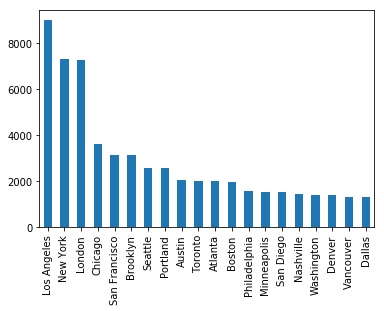

In [99]:
# Top 20 cities by project frequency

filtered_df['city'].value_counts().head(20).plot(kind='bar')

In [100]:
# Top 20 non-US cities

#filtered_df['city'][filtered_df['location']['country'] != 'US'].value_counts().head(20).plot(kind='bar')

In [101]:
filtered_df['location'][0]['country']

'US'

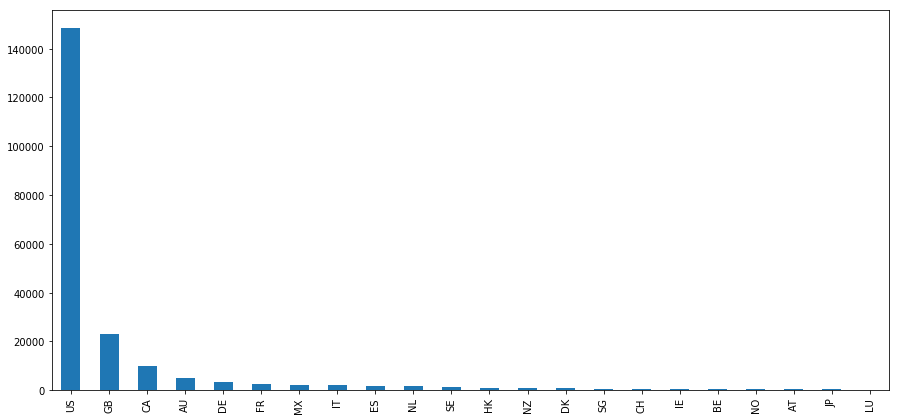

In [102]:
plt.figure(figsize=(15,7))
data['country'].value_counts().plot(kind='bar')

### The 'name' column

In [103]:
col = 'name'
filtered_df[col].describe()

count     192449
unique    168248
top         Home
freq           7
Name: name, dtype: object

In [104]:
filtered_df[[col]].isna().sum()

name    0
dtype: int64

No missing values but apparently 24000 non-unique entries / names. This certainly requires further addressing.

(array([1.7500e+02, 2.0140e+03, 4.6760e+03, 7.2080e+03, 6.3200e+03,
        1.0650e+04, 1.1619e+04, 1.1723e+04, 1.1596e+04, 7.6240e+03,
        1.1384e+04, 1.0886e+04, 1.0356e+04, 1.0273e+04, 6.5950e+03,
        9.6620e+03, 9.4940e+03, 9.8190e+03, 1.0464e+04, 7.8960e+03,
        1.4683e+04, 7.1510e+03, 2.0000e+01, 1.4000e+01, 1.6000e+01,
        2.1000e+01, 2.4000e+01, 2.5000e+01, 2.3000e+01, 3.8000e+01]),
 array([ 1. ,  3.8,  6.6,  9.4, 12.2, 15. , 17.8, 20.6, 23.4, 26.2, 29. ,
        31.8, 34.6, 37.4, 40.2, 43. , 45.8, 48.6, 51.4, 54.2, 57. , 59.8,
        62.6, 65.4, 68.2, 71. , 73.8, 76.6, 79.4, 82.2, 85. ]),
 <a list of 30 Patch objects>)

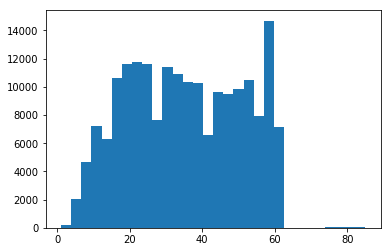

In [105]:
# Look at the distribution of project name lengths
plt.hist([len(x) for x in filtered_df[col]], bins=30)

In [106]:
# Look into:
# lenght of name vs successful / failed funding
# sentiment analysis vs. funding success

### The 'photo' column

In [107]:
col = 'photo'
filtered_df[col].describe()

count                                                192449
unique                                               168766
top       {"key":"assets/014/906/387/fb4a9208ec9b097b8cc...
freq                                                      2
Name: photo, dtype: object

In [108]:
filtered_df[col].head()

0    {"key":"assets/011/625/534/5bea1760d7f20943c4c...
1    {"key":"assets/024/033/030/dea4e3901d10195b035...
2    {"key":"assets/014/262/672/97944960ba30239051d...
3    {"key":"assets/023/008/626/aef53e2f326ad4c8772...
4    {"key":"assets/012/061/410/1687a735d5b1316ca47...
Name: photo, dtype: object

Another column that looks like str reprensentation of a dict

In [109]:
filtered_df[col].isna().sum()

0

In [110]:
eval(filtered_df[col][0])['1536x864']

'https://ksr-ugc.imgix.net/assets/011/625/534/5bea1760d7f20943c4cd5e9b4911c1bd_original.jpg?ixlib=rb-1.1.0&crop=faces&w=1552&h=873&fit=crop&v=1463685705&auto=format&frame=1&q=92&s=90c72b785ef97539099dffb8531dcad3'

In [111]:
# Turn strings into dicts and check for exceptions errors

del_idx = []
count = 0
for idx, x in enumerate(filtered_df[col]):

    try:
        filtered_df.at[idx, col] = eval(x.replace('false', 'False').replace('true', 'True').replace('null', 'None'))
        #eval(x.replace('null', 'None'))
    except:
        count += 1
        del_idx.append(idx)
print(count)

0


TODO: Analyse 'photos'

### The 'pledged' column

pledged data is given in native currencies. **So can be dropped in favour of 'usd_pledged' which gives pledged amount in same currency (USD)**

In [112]:
col = 'pledged'
filtered_df[col].dtypes

dtype('float64')

In [113]:
filtered_df[col].describe()

count    1.924490e+05
mean     1.971593e+04
std      3.352984e+05
min      0.000000e+00
25%      1.500000e+02
50%      1.800000e+03
75%      7.471000e+03
max      8.103074e+07
Name: pledged, dtype: float64

In [114]:
filtered_df[col].isna().sum()

0

No missing values 

In [115]:
filtered_df[col].value_counts()


0.00         15003
1.00          4971
10.00         1679
2.00          1341
5.00          1229
             ...  
7455.18          1
7182.67          1
11609.00         1
12477.00         1
262143.00        1
Name: pledged, Length: 43035, dtype: int64

15003 projects that pledged 0 USD?

In [116]:
droplist.append(col)
#filtered_df.drop('pledged', inplace=True, axis=1)

### The 'profile' column

In [117]:
col = 'profile'

filtered_df[col].head()

0    {"id":822687,"project_id":822687,"state":"inac...
1    {"id":3665299,"project_id":3665299,"state":"in...
2    {"id":2730508,"project_id":2730508,"state":"in...
3    {"id":3498742,"project_id":3498742,"state":"ac...
4    {"id":1754403,"project_id":1754403,"state":"in...
Name: profile, dtype: object

Yet another column with str reprensentation of a dict. Lets look into one entry:

In [118]:
entry = eval(filtered_df[col][0].replace('null', 'None').replace('false', 'False').replace('true', 'True'))
entry

{'id': 822687,
 'project_id': 822687,
 'state': 'inactive',
 'state_changed_at': 1425915845,
 'name': None,
 'blurb': None,
 'background_color': None,
 'text_color': None,
 'link_background_color': None,
 'link_text_color': None,
 'link_text': None,
 'link_url': None,
 'show_feature_image': False,
 'background_image_opacity': 0.8,
 'should_show_feature_image_section': True,
 'feature_image_attributes': {'image_urls': {'default': 'https://ksr-ugc.imgix.net/assets/011/625/534/5bea1760d7f20943c4cd5e9b4911c1bd_original.jpg?ixlib=rb-1.1.0&crop=faces&w=1552&h=873&fit=crop&v=1463685705&auto=format&frame=1&q=92&s=90c72b785ef97539099dffb8531dcad3',
   'baseball_card': 'https://ksr-ugc.imgix.net/assets/011/625/534/5bea1760d7f20943c4cd5e9b4911c1bd_original.jpg?ixlib=rb-1.1.0&crop=faces&w=560&h=315&fit=crop&v=1463685705&auto=format&frame=1&q=92&s=883b3ff098e5fc4cf6fec280665f5fd0'}}}

In [119]:
list(entry.keys())

['id',
 'project_id',
 'state',
 'state_changed_at',
 'name',
 'blurb',
 'background_color',
 'text_color',
 'link_background_color',
 'link_text_color',
 'link_text',
 'link_url',
 'show_feature_image',
 'background_image_opacity',
 'should_show_feature_image_section',
 'feature_image_attributes']

In [120]:
# Check which of the entries of the 'profile' column already exist as separate column s

for e in list(data.columns):
    if e in list(entry.keys()):
        print(e)

blurb
id
name
state
state_changed_at


In [121]:
## TODO: Check whether contents also match

Seems like a repetition of other columns. And some additional information. Well drop the column for now.

In [122]:
droplist.append(col)

### The 'slug' column

In [123]:
col = 'slug'
filtered_df[col].head()

0                                new-final-round-album
1                      princess-pals-enamel-pin-series
2    their-life-through-their-lens-the-amish-and-me...
3                             wao-the-eco-effect-shoes
4                       apple-watch-development-course
Name: slug, dtype: object

In [124]:
filtered_df['name'].head()

0                                New Final Round Album
1                      Princess Pals Enamel Pin Series
2    Their Life Through Their Lens-the Amish and Me...
3                            WAO: THE ECO EFFECT SHOES
4                       Apple Watch Development Course
Name: name, dtype: object

At first glance, this looks like the 'name' column in all lower case and with hyphens instead of whitespaces.

In [125]:
filtered_df[col].describe()

count                192449
unique               168766
top       city-mystic-paris
freq                      2
Name: slug, dtype: object

In [126]:
[filtered_df['name'].str.lower().replace(' ', '-').replace(':', '') == filtered_df[col]]

[0         False
 1         False
 2         False
 3         False
 4         False
           ...  
 192444    False
 192445    False
 192446    False
 192447    False
 192448    False
 Length: 192449, dtype: bool]

In [127]:
li = []
for i in range(10):
    
    li.append(filtered_df['name'][i].lower().replace(' ', '-').replace(':', '') == filtered_df['slug'][i])
    

In [128]:
filtered_df[col].str.len().max()

53

In [129]:
filtered_df[col][2]

'their-life-through-their-lens-the-amish-and-mennon'

In [130]:
filtered_df['name'][2].lower().replace(' ', '-').replace(':', '')

'their-life-through-their-lens-the-amish-and-mennonite-people'

In [131]:
filtered_df[col].str.lower().replace(' ', '-').replace(':', '')

0                                     new-final-round-album
1                           princess-pals-enamel-pin-series
2         their-life-through-their-lens-the-amish-and-me...
3                                  wao-the-eco-effect-shoes
4                            apple-watch-development-course
                                ...                        
192444                              steam-hollow-brewing-co
192445    fusion-detox-chef-alan-wichert-creates-the-health
192446                 gorgeous-princess-cheetah-collection
192447    the-lion-and-the-lyceum-childrens-book-based-o...
192448                   philip-e-west-aviation-masterworks
Name: slug, Length: 192449, dtype: object

droplist.append(col)

### The 'source_url' column

In [132]:
col = 'source_url'
filtered_df[col][1000]

'https://www.kickstarter.com/discover/categories/fashion'

This is just an url to the category of the project, drop.

In [133]:
droplist.append(col)

### The 'staff_pick' column

staff_pick - whether a project was highlighted as a staff_pick when it was launched/live

Seems like an interesting variable. 

In [134]:
col = 'staff_pick'

filtered_df[col].head()

0    False
1    False
2     True
3    False
4    False
Name: staff_pick, dtype: bool

In [135]:
filtered_df[col].value_counts()

False    166509
True      25940
Name: staff_pick, dtype: int64

In [136]:
round(25940/(25940+166509)*100, 2)

13.48

13.48 % of projects where highlighted as staff_pick, when they were launched/live.

### The 'state_changed_at' column
state_changed_at - date and time of when a project's status was changed (same as the deadline for successful and failed projects)

In [137]:
col = 'state_changed_at'

filtered_df[col].head()

0    1391899046
1    1551801611
2    1480607932
3    1544309940
4    1428511019
Name: state_changed_at, dtype: int64

In [138]:
# Conver to datetime object
filtered_df[col] = pd.to_datetime(filtered_df[col], unit='s')

### The 'static_usd_rate' column

static_usd_rate - conversion rate between the original currency and USD

In [139]:
col = 'static_usd_rate'

filtered_df[col].head()

0    1.000000
1    1.000000
2    1.000000
3    1.136525
4    1.000000
Name: static_usd_rate, dtype: float64

Assume column is just a mulitplier to convert 'pledge' to 'usd_plegded', drop.

In [140]:
droplist.append(col)

### The 'urls' columns
urls - url to the project's page

In [141]:
col = 'urls'

filtered_df[col].head()

0    {"web":{"project":"https://www.kickstarter.com...
1    {"web":{"project":"https://www.kickstarter.com...
2    {"web":{"project":"https://www.kickstarter.com...
3    {"web":{"project":"https://www.kickstarter.com...
4    {"web":{"project":"https://www.kickstarter.com...
Name: urls, dtype: object

In [142]:
eval(filtered_df[col][0])

{'web': {'project': 'https://www.kickstarter.com/projects/1495925645/new-final-round-album?ref=discovery_category_newest',
  'rewards': 'https://www.kickstarter.com/projects/1495925645/new-final-round-album/rewards'}}

Just links to the project page, drop.

In [143]:
droplist.append(col)

### The 'usd_pledged' column
usd_pledged - amount pledged in USD

In [144]:
col = 'usd_pledged'

filtered_df[col].head()

0      802.00000
1     2259.00000
2    29638.00000
3    49075.15252
4      549.00000
Name: usd_pledged, dtype: float64

In [145]:
filtered_df[col].describe()

count    1.924490e+05
mean     1.352750e+04
std      8.923302e+04
min      0.000000e+00
25%      1.500000e+02
50%      1.771000e+03
75%      7.100000e+03
max      8.596475e+06
Name: usd_pledged, dtype: float64

In [146]:
filtered_df[col].isna().sum()

0

In [147]:
filtered_df[col].value_counts()

0.000000        15003
1.000000         3561
10.000000        1116
25.000000         970
2.000000          916
                ...  
9081.163757         1
25085.110000        1
315.486809          1
29478.000000        1
313.456542          1
Name: usd_pledged, Length: 75165, dtype: int64

In [148]:
filtered_df[filtered_df[col] == np.float(0)]['state'].value_counts()

failed    15003
Name: state, dtype: int64

### The 'usd_type' column
usd_type - domestic or international

In [149]:
col = 'usd_type'

filtered_df[col].head()

0    international
1    international
2    international
3    international
4         domestic
Name: usd_type, dtype: object

In [150]:
filtered_df[col].unique()

array(['international', 'domestic', nan], dtype=object)

In [151]:
filtered_df[col].isna().sum()

38

38 missing values, but can be ignored as columns will be dropped anyways.

In [152]:
droplist.append(col)

In [153]:
droplist

['friends',
 'is_backing',
 'is_starred',
 'permissions',
 'pledged',
 'profile',
 'source_url',
 'static_usd_rate',
 'urls',
 'usd_type']

In [154]:
filtered_df.shape

(192449, 45)

In [155]:
filtered_df.drop(droplist, axis=1, inplace=True)

In [156]:
filtered_df.shape

(192449, 35)

In [157]:
filtered_df.columns

Index(['level_0', 'index', 'backers_count', 'blurb', 'category',
       'converted_pledged_amount', 'country', 'created_at', 'creator',
       'currency', 'currency_symbol', 'currency_trailing_code',
       'current_currency', 'deadline', 'disable_communication', 'fx_rate',
       'goal', 'id', 'is_starrable', 'launched_at', 'location', 'name',
       'photo', 'slug', 'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'usd_pledged', 'launch_weekday', 'launch_year', 'launch_month',
       'launch_day', 'launch_hour', 'city'],
      dtype='object')

### The rest of the columns

In [158]:
# split creator column entry in sub_columns
df_tot = filtered_df
import json 
#df_creator = pd.DataFrame(json.loads(df_tot.creator.values))
creator_dlist = list()
idx_drop = list()
backup = None
#print(json.loads(df_tot.creator.values[0]))
count = 0
for idx, x in enumerate(df_tot.creator.values):
  try:
    creator_dlist.append(json.loads(x))
    #df_tot.creator.values[idx] = json.loads(x)
  except:
    # catches the other cases with the exception of 7 cases
    a = x.index("\"name\":")
    b = x.index("\"", a + 8)
    x = x[:b] + "'" + x[b + 1:]
    c = x.index("\"", b)
    x = x[:c] + "'" + x[c + 1:]
    try:
      creator_dlist.append(json.loads(x))
    except:
      print(a,b,c)
      count += 1
      idx_drop.append(idx)
print(count)
df_creator = pd.DataFrame(creator_dlist)
df_creator.columns = ['crea_' + x for x in df_creator.columns]
df_creator.info()
#df_tot2 = df_tot.drop(idx_drop, axis = 0).reset_index()
df_tot2 = df_tot#.reset_index()

16 65 67
16 32 50
16 65 67
17 33 36
17 43 57
5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192444 entries, 0 to 192443
Data columns (total 7 columns):
crea_id                 192444 non-null int64
crea_name               192444 non-null object
crea_is_registered      0 non-null object
crea_chosen_currency    0 non-null object
crea_avatar             192444 non-null object
crea_urls               192444 non-null object
crea_slug               57211 non-null object
dtypes: int64(1), object(6)
memory usage: 10.3+ MB


In [159]:
# drop two columns with only null entry
df_creator.drop(['crea_is_registered', 'crea_chosen_currency'], axis = 1, inplace = True)
df_creator.head()

,crea_id,crea_name,crea_avatar,crea_urls,crea_slug
0,1495925645,Daniel,{'thumb': 'https://ksr-ugc.imgix.net/assets/00...,{'web': {'user': 'https://www.kickstarter.com/...,NaN
1,1175589980,Katherine,{'thumb': 'https://ksr-ugc.imgix.net/assets/02...,{'web': {'user': 'https://www.kickstarter.com/...,freckleddisney
2,1196856269,MelissaThomas,{'thumb': 'https://ksr-ugc.imgix.net/assets/01...,{'web': {'user': 'https://www.kickstarter.com/...,NaN
3,1569700626,WAO,{'thumb': 'https://ksr-ugc.imgix.net/assets/02...,{'web': {'user': 'https://www.kickstarter.com/...,wearewao
4,1870845385,Kalpit Jain,{'thumb': 'https://ksr-ugc.imgix.net/assets/00...,{'web': {'user': 'https://www.kickstarter.com/...,NaN


In [160]:
category_dlist = list()
count = 0
for idx, x in enumerate(df_tot2.category.values):
  try:
    category_dlist.append(json.loads(x))
  except:
    count += 1

print(count)

df_category = pd.DataFrame(category_dlist)
df_category.columns = ['cat_' + x for x in df_category.columns]
df_category.info()

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192449 entries, 0 to 192448
Data columns (total 7 columns):
cat_id           192449 non-null int64
cat_name         192449 non-null object
cat_slug         192449 non-null object
cat_position     192449 non-null int64
cat_parent_id    184193 non-null float64
cat_color        192449 non-null int64
cat_urls         192449 non-null object
dtypes: float64(1), int64(3), object(3)
memory usage: 10.3+ MB


In [161]:
df_category.cat_name = df_category.cat_name.str.lower()
df_category.cat_name = df_category.cat_name.str.replace(" ", "_")
df_category.columns = ['cat_super' if x=='cat_slug' else x for x in df_category.columns]
df_category.cat_super = [str(x).split(sep = '/')[0] for x in df_category.cat_super.values]
df_category.cat_super = df_category.cat_super.replace(" ", "_")
df_category.tail()

,cat_id,cat_name,cat_super,cat_position,cat_parent_id,cat_color,cat_urls
192444,307,drinks,food,4,10.0,16725570,{'web': {'discover': 'http://www.kickstarter.c...
192445,306,cookbooks,food,3,10.0,16725570,{'web': {'discover': 'http://www.kickstarter.c...
192446,264,childrenswear,fashion,3,9.0,16752598,{'web': {'discover': 'http://www.kickstarter.c...
192447,46,children's_books,publishing,5,18.0,14867664,{'web': {'discover': 'http://www.kickstarter.c...
192448,23,painting,art,7,1.0,16760235,{'web': {'discover': 'http://www.kickstarter.c...


In [162]:
df_tot3 = pd.concat([df_tot2, df_creator, df_category],axis = 1)
df_tot3.drop(['creator', 'category'], inplace = True, axis = 1)
df_tot3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192449 entries, 0 to 192448
Data columns (total 45 columns):
level_0                     192449 non-null int64
index                       192449 non-null int64
backers_count               192449 non-null int64
blurb                       192447 non-null object
converted_pledged_amount    192449 non-null int64
country                     192449 non-null object
created_at                  192449 non-null int64
currency                    192449 non-null object
currency_symbol             192449 non-null object
currency_trailing_code      192449 non-null bool
current_currency            192449 non-null object
deadline                    192449 non-null int64
disable_communication       192449 non-null bool
fx_rate                     192449 non-null float64
goal                        192449 non-null float64
id                          192449 non-null int64
is_starrable                192449 non-null bool
launched_at                 19244

In [163]:
df_tot3.created_at = pd.to_datetime(df_tot3.created_at, unit='s')
df_tot3.deadline = pd.to_datetime(df_tot3.deadline, unit='s')

In [164]:
df_tot3.id = df_tot3.id.astype('category')

In [165]:
df_tot3.blurb = df_tot3.blurb.fillna('')
df_tot3.blurb = df_tot3.blurb.astype(str)
blurb_wc = [len(str(x).lower().split()) for x in df_tot3.blurb]
blurb_un_words = [set(str(x).lower().split()) for x in df_tot3.blurb]
blurb_un_words = set.union(*blurb_un_words)
print(len(blurb_un_words))
print(set(blurb_wc))
df_tot3['blurb_wordcount'] = blurb_wc
#df_tot3[df_tot3.blurb.isna()]
# keyword analysis in blurb as bonus

211724
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35}


In [166]:
df_tot3.country = df_tot3.country.astype('category')
df_tot3.currency = df_tot3.currency.astype('category')
df_tot3.currency_symbol = df_tot3.currency_symbol.astype('category')
df_tot3.current_currency = df_tot3.current_currency.astype('category')

In [167]:
# deletes columns that contain only little information
#df_tot4 = df_tot3.drop(['friends', 'is_backing', 'is_starred', 'permissions'], axis = 1)
df_tot4 = df_tot3

In [168]:
df_tot4.crea_slug = df_tot4.crea_slug.fillna('')
df_tot4.cat_parent_id = df_tot4.cat_parent_id.fillna(0)

In [169]:
# list of project list according to unique ids
id_groupby = df_tot4.groupby('id')

id_groupby2 = id_groupby.size().reset_index(name='counts')
indexid = id_groupby2[id_groupby2.counts > 1].index
iddouble_list = id_groupby2[id_groupby2.counts > 1].id.unique()


In [170]:
double_entries_sublist = [df_tot4[df_tot4.id == x].index[1:] for x in iddouble_list]
double_entries_sublist_flat = list()
for y in double_entries_sublist:
  for x in y:
    double_entries_sublist_flat.append(x)
#double_entries_sublist_flat

In [171]:
df_tot5 = df_tot4.drop(double_entries_sublist_flat, axis = 0)

In [172]:
# list of project list of unique creator
unique_crea_set = set(df_tot5.crea_id.unique())
#crea_id_entry

creaid_groupby = df_tot5.groupby('crea_id')


creaid_groupby2 = creaid_groupby.size().reset_index(name='counts')
indexcreaid = creaid_groupby2[creaid_groupby2.counts > 1].index
creaiddouble_list = creaid_groupby2[creaid_groupby2.counts > 1].crea_id.unique()
# number of creators with x projects
multi_proj = list()
x_list = list()
for x in range(1,75):
  a = len(creaid_groupby2[creaid_groupby2.counts == x].crea_id.unique())
  multi_proj.append(a)
  x_list.append(x)
  #print(x, np.log10(a))

In [173]:
#df_tot5.cat_super.hist(bins = len(df_tot5.cat_super.unique()), figsize = (17,17), grid = False)

In [174]:
#df_tot5[df_tot5.state == 'successful'].cat_super.hist(bins = len(df_tot5.cat_super.unique()), figsize = (17,17), grid = False)

In [175]:
#df_tot5[df_tot5.state == 'failed'].cat_super.hist(bins = len(df_tot5.cat_super.unique()), figsize = (17,17), grid = False)

In [176]:
init_month = [x.astype('datetime64[M]').astype(int) % 12 + 1 for x in df_tot5.created_at.values]
end_month = [x.astype('datetime64[M]').astype(int) % 12 + 1 for x in df_tot5.deadline.values]
init_year = [x.astype('datetime64[Y]').astype(int) + 1970 for x in df_tot5.created_at.values]
end_year = [x.astype('datetime64[Y]').astype(int) + 1970 for x in df_tot5.deadline.values]
init_month_succ = [x.astype('datetime64[M]').astype(int) % 12 + 1 for x in df_tot5[df_tot5.state == 'successful'].created_at.values]
end_month_succ = [x.astype('datetime64[M]').astype(int) % 12 + 1 for x in df_tot5[df_tot5.state == 'successful'].deadline.values]
init_year_succ = [x.astype('datetime64[Y]').astype(int) + 1970 for x in df_tot5[df_tot5.state == 'successful'].created_at.values]
end_year_succ = [x.astype('datetime64[Y]').astype(int) + 1970 for x in df_tot5[df_tot5.state == 'successful'].deadline.values]
print(df_tot5.created_at.values[1], df_tot5.created_at.values[1].astype('datetime64[M]').astype(int) % 12 + 1)
init_year[1]

2019-02-08T21:02:48.000000000 2


2019

(array([28687., 14935., 14190., 14703., 13634., 16317., 14534., 13906.,
        14444., 23416.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <a list of 10 Patch objects>)

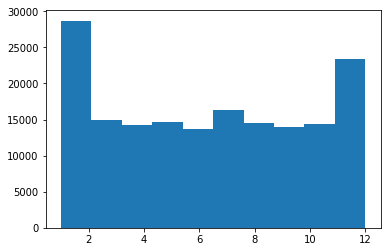

In [177]:
plt.hist(init_month)

(array([16490.,  8801.,  8118.,  8442.,  7499.,  8200.,  8029.,  7922.,
         8234., 12879.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <a list of 10 Patch objects>)

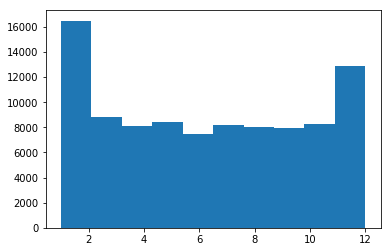

In [178]:
plt.hist(init_month_succ)

(array([22513., 15122., 13801., 14491., 14307., 14940., 15637., 13897.,
        14531., 29527.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <a list of 10 Patch objects>)

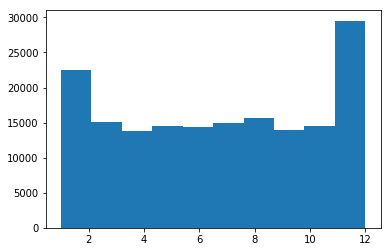

In [179]:
plt.hist(end_month)

(array([12237.,  8670.,  8058.,  8389.,  8138.,  8372.,  8209.,  7373.,
         8305., 16863.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <a list of 10 Patch objects>)

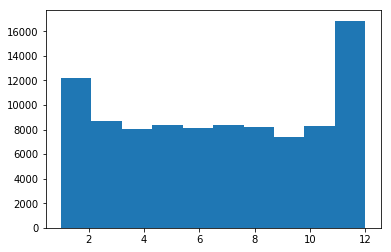

In [180]:
plt.hist(end_month_succ)

(array([  184.,  1319.,  4425.,  9684., 12026., 27362., 34191., 25993.,
        25767., 27815.]),
 array([2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016., 2017.,
        2018., 2019.]),
 <a list of 10 Patch objects>)

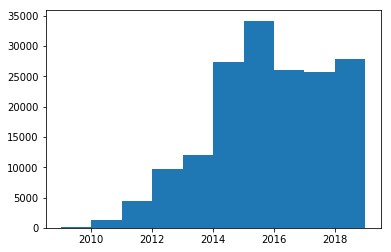

In [181]:
plt.hist(init_year)

(array([  150.,  1032.,  3483.,  7492.,  9323., 14080., 14893., 12648.,
        13288., 18225.]),
 array([2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016., 2017.,
        2018., 2019.]),
 <a list of 10 Patch objects>)

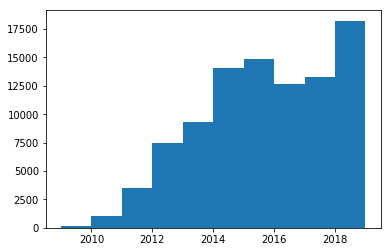

In [182]:
plt.hist(init_year_succ)

(array([  103.,  1052.,  3817.,  8352., 10876., 24370., 35100., 26796.,
        25872., 32428.]),
 array([2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016., 2017.,
        2018., 2019.]),
 <a list of 10 Patch objects>)

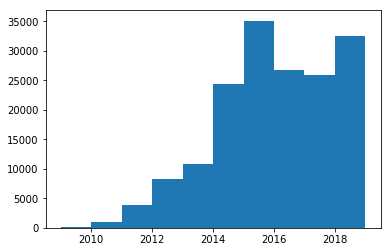

In [183]:
plt.hist(end_year)

(array([   86.,   817.,  3043.,  6511.,  8718., 13273., 15469., 12840.,
        12959., 20898.]),
 array([2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016., 2017.,
        2018., 2019.]),
 <a list of 10 Patch objects>)

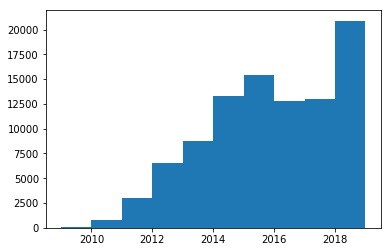

In [184]:
plt.hist(end_year_succ)

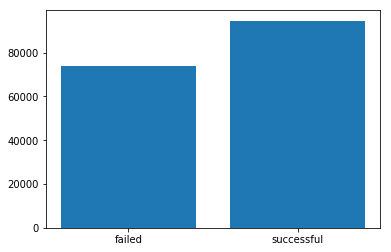

In [185]:
stategroupby = df_tot5.groupby('state').count().blurb
statedict = dict(stategroupby)
plt.bar(statedict.keys(), statedict.values());

In [186]:
!pip install gender-guesser
import gender_guesser.detector as gender

In [187]:
for x in df_tot5['crea_name']:
    if type(x) == float:
        print(x)

nan
nan
nan


In [188]:
d = gender.Detector()
gender_list = list()
for x in df_tot5.crea_name.values:
  gender_list.append(d.get_gender(str(x).split()[0]))
gender_list
male_count = 0
mmale_count = 0
female_count = 0
mfemale_count = 0
unknown_count = 0
unclear_count = 0

for x in gender_list:
  if x == 'male':
    male_count += 1
  elif x == 'mostly_male':
    mmale_count += 1
  elif x == 'female':
    female_count += 1
  elif x == 'mostly_female':
    mfemale_count += 1
  elif x == 'unknown':
    unknown_count += 1
  else:
    unclear_count += 1
print(male_count, mmale_count, female_count, mfemale_count, unknown_count, unclear_count)
for idx, x in enumerate(gender_list):
  if x == 'mostly_male':
    gender_list[idx] = 'male'
  elif x == 'mostly_female':
    gender_list[idx] = 'female'
  elif x == 'andy':
    gender_list[idx] = 'unknown'

67525 6532 30628 6503 55860 1718


In [189]:
df_tot5['gender'] = gender_list

In [190]:
df_tot5.describe()

,level_0,index,backers_count,converted_pledged_amount,fx_rate,goal,usd_pledged,launch_year,launch_month,launch_day,launch_hour,crea_id,cat_id,cat_position,cat_parent_id,cat_color,blurb_wordcount
count,168766.000000,168766.000000,168766.000000,1.687660e+05,168766.000000,1.687660e+05,1.687660e+05,168766.000000,168766.000000,168766.000000,168766.000000,1.687630e+05,168766.000000,168766.000000,168766.000000,1.687660e+05,168766.000000
mean,91819.319756,1885.879087,140.174834,1.211197e+04,0.996631,4.845453e+04,1.212138e+04,2015.456674,6.426389,15.233216,13.582043,1.074313e+09,172.051272,7.122252,11.176084,1.206977e+07,19.007223
std,55449.837452,1094.947890,895.487385,8.373549e+04,0.201235,1.160559e+06,8.379143e+04,1.946499,3.350598,8.864271,6.938604,6.206031e+08,134.307616,4.608503,5.936704,5.866742e+06,4.981585
min,0.000000,0.000000,0.000000,0.000000e+00,0.008966,1.000000e-02,0.000000e+00,2009.000000,1.000000,1.000000,0.000000,3.000000e+00,1.000000,1.000000,0.000000,5.162700e+04,0.000000
25%,43437.250000,933.000000,3.000000,1.000000e+02,1.000000,1.500000e+03,1.000000e+02,2014.000000,4.000000,8.000000,8.000000,5.357377e+08,37.000000,3.000000,9.000000,6.526716e+06,16.000000
50%,89596.500000,1881.000000,25.000000,1.452000e+03,1.000000,5.000000e+03,1.455000e+03,2015.000000,6.000000,15.000000,15.000000,1.073671e+09,250.000000,6.000000,12.000000,1.486766e+07,20.000000
75%,139020.750000,2836.000000,85.000000,6.235000e+03,1.000000,1.500000e+04,6.237891e+03,2017.000000,9.000000,23.000000,19.000000,1.612592e+09,301.000000,10.000000,16.000000,1.674378e+07,22.000000
max,192662.000000,3795.000000,105857.000000,8.596474e+06,1.748586,1.000000e+08,8.596475e+06,2019.000000,12.000000,31.000000,23.000000,2.147483e+09,389.000000,19.000000,26.000000,1.677606e+07,35.000000


In [191]:
df_tot5.state.unique()

array(['successful', 'failed'], dtype=object)

In [192]:
suclist = list()
for x in df_tot5.state.values:
    if x == 'successful':
        suclist.append(1)
    else:
        suclist.append(0)
df_tot5['success'] = suclist

In [193]:
df_tot5[df_tot5.usd_pledged == 0.].count()

level_0                     14815
index                       14815
backers_count               14815
blurb                       14815
converted_pledged_amount    14815
country                     14815
created_at                  14815
currency                    14815
currency_symbol             14815
currency_trailing_code      14815
current_currency            14815
deadline                    14815
disable_communication       14815
fx_rate                     14815
goal                        14815
id                          14815
is_starrable                14815
launched_at                 14815
location                    14815
name                        14815
photo                       14815
slug                        14815
spotlight                   14815
staff_pick                  14815
state                       14815
state_changed_at            14815
usd_pledged                 14815
launch_weekday              14815
launch_year                 14815
launch_month  

In [194]:
corrm = df_tot5.corr()

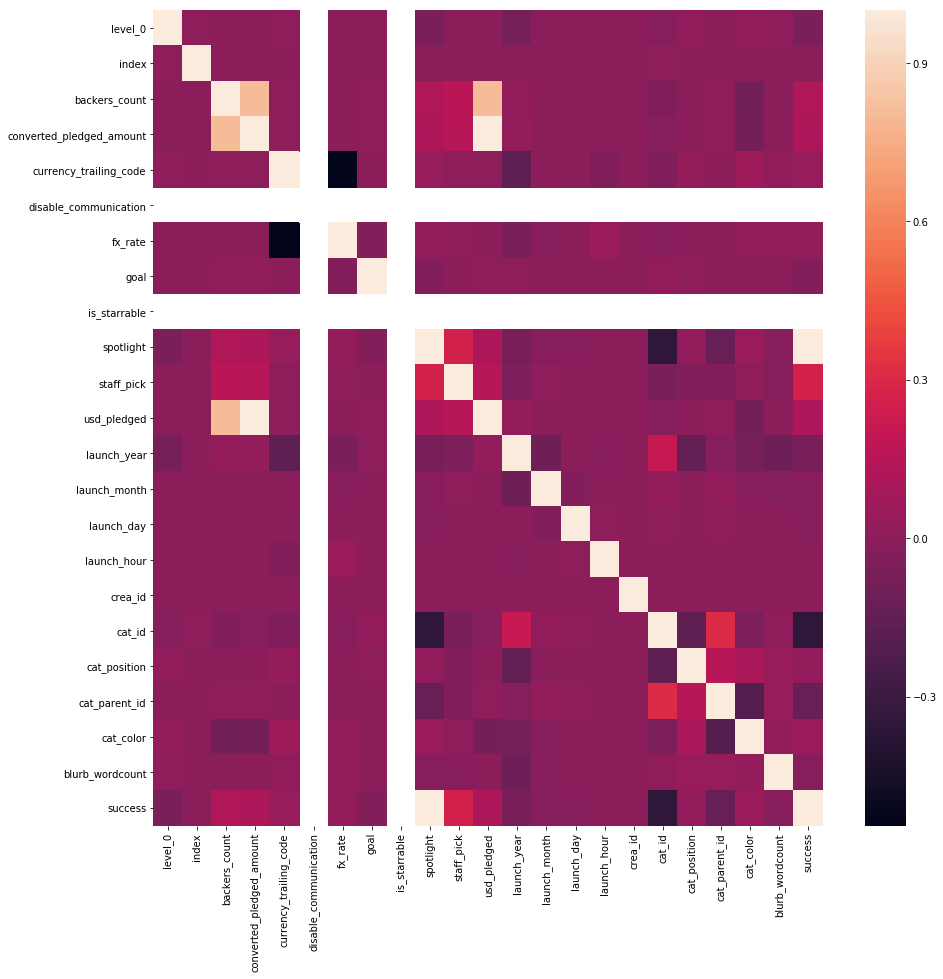

In [195]:
plt.figure(figsize = (15,15))
sns.heatmap(corrm)

In [196]:
df_tot5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168766 entries, 0 to 192447
Data columns (total 48 columns):
level_0                     168766 non-null int64
index                       168766 non-null int64
backers_count               168766 non-null int64
blurb                       168766 non-null object
converted_pledged_amount    168766 non-null int64
country                     168766 non-null category
created_at                  168766 non-null datetime64[ns]
currency                    168766 non-null category
currency_symbol             168766 non-null category
currency_trailing_code      168766 non-null bool
current_currency            168766 non-null category
deadline                    168766 non-null datetime64[ns]
disable_communication       168766 non-null bool
fx_rate                     168766 non-null float64
goal                        168766 non-null float64
id                          168766 non-null category
is_starrable                168766 non-null bool
laun

In [197]:
df_tot5.gender = df_tot5.gender.astype('category')
df_tot5.cat_super = df_tot5.cat_super.astype('category')
df_tot5.cat_parent_id = df_tot5.cat_parent_id.astype('category')
#df_tot5.city = df_tot5.city.astype('category')
df_tot5.gender = df_tot5.gender.astype('category')

In [198]:
np.sort(list(df_tot5.cat_position.unique()))

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

In [199]:
a = 0
for x in df_tot5.columns:
    if x in ['level_0', 'index', 'blurb', 'converted_pledged_amount',\
        'currency', 'currency_symbol', 'currency_trailing_code',\
        'id', 'name', 'slug', 'photo', 'state', 'state_changed_at',\
        'crea_name', 'crea_avatar', 'crea_urls', 'crea_slug',\
        'cat_color', 'cat_urls', 'cat_parent_id', 'cat_id']:
        print(a,x)
    a += 1

0 level_0
1 index
3 blurb
4 converted_pledged_amount
7 currency
8 currency_symbol
9 currency_trailing_code
15 id
19 name
20 photo
21 slug
24 state
25 state_changed_at
34 crea_name
35 crea_avatar
36 crea_urls
37 crea_slug
38 cat_id
42 cat_parent_id
43 cat_color
44 cat_urls


In [200]:
df_tot5[['level_0', 'index', 'blurb', 'converted_pledged_amount',\
        'currency', 'currency_symbol', 'currency_trailing_code',\
        'id', 'name', 'slug', 'photo', 'state', 'state_changed_at',\
        'crea_name', 'crea_avatar', 'crea_urls', 'crea_slug',\
        'cat_color', 'cat_urls', 'cat_parent_id', 'cat_id']]

,level_0,index,blurb,converted_pledged_amount,currency,currency_symbol,currency_trailing_code,id,name,slug,...,state,state_changed_at,crea_name,crea_avatar,crea_urls,crea_slug,cat_color,cat_urls,cat_parent_id,cat_id
0,0,0,2006 was almost 7 years ago.... Can you believ...,802,USD,$,True,287514992,New Final Round Album,new-final-round-album,...,successful,2014-02-08 22:37:26,Daniel,{'thumb': 'https://ksr-ugc.imgix.net/assets/00...,{'web': {'user': 'https://www.kickstarter.com/...,,10878931,{'web': {'discover': 'http://www.kickstarter.c...,14.0,43
1,1,1,An adorable fantasy enamel pin series of princ...,2259,USD,$,True,385129759,Princess Pals Enamel Pin Series,princess-pals-enamel-pin-series,...,successful,2019-03-05 16:00:11,Katherine,{'thumb': 'https://ksr-ugc.imgix.net/assets/02...,{'web': {'user': 'https://www.kickstarter.com/...,freckleddisney,16760235,{'web': {'discover': 'http://www.kickstarter.c...,1.0,54
2,2,2,Helping a community come together to set the s...,29638,USD,$,True,681033598,Their Life Through Their Lens-the Amish and Me...,their-life-through-their-lens-the-amish-and-me...,...,successful,2016-12-01 15:58:52,MelissaThomas,{'thumb': 'https://ksr-ugc.imgix.net/assets/01...,{'web': {'user': 'https://www.kickstarter.com/...,,58341,{'web': {'discover': 'http://www.kickstarter.c...,15.0,280
3,3,3,Every revolution starts from the bottom and we...,49158,EUR,€,False,1031782682,WAO: THE ECO EFFECT SHOES,wao-the-eco-effect-shoes,...,successful,2018-12-08 22:59:00,WAO,{'thumb': 'https://ksr-ugc.imgix.net/assets/02...,{'web': {'user': 'https://www.kickstarter.com/...,wearewao,16752598,{'web': {'discover': 'http://www.kickstarter.c...,9.0,266
4,4,4,Learn to build 10+ Applications in this comple...,549,USD,$,True,904085819,Apple Watch Development Course,apple-watch-development-course,...,failed,2015-04-08 16:36:59,Kalpit Jain,{'thumb': 'https://ksr-ugc.imgix.net/assets/00...,{'web': {'user': 'https://www.kickstarter.com/...,,6526716,{'web': {'discover': 'http://www.kickstarter.c...,16.0,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192442,192657,957,There are known website for providing free and...,135,USD,$,True,329361477,Art and craft free resources website,art-and-craft-free-resources-website,...,failed,2017-03-23 17:42:02,Alex Beene,{'thumb': 'https://ksr-ugc.imgix.net/assets/00...,{'web': {'user': 'https://www.kickstarter.com/...,,16744876,{'web': {'discover': 'http://www.kickstarter.c...,26.0,344
192443,192658,958,The first book in an inspirational series for ...,18608,USD,$,True,1535606205,Enny Penny's Wishes,enny-pennys-wishes,...,successful,2013-08-11 11:46:39,CPS Books / G2 Entertainment,{'thumb': 'https://ksr-ugc.imgix.net/assets/02...,{'web': {'user': 'https://www.kickstarter.com/...,phodography,14867664,{'web': {'discover': 'http://www.kickstarter.c...,18.0,46
192445,192660,961,Over 250 healthy recipes free from ANY added S...,305,AUD,$,True,298098561,Fusion Detox - Chef Alan Wichert creates THE h...,fusion-detox-chef-alan-wichert-creates-the-health,...,failed,2016-01-25 09:15:10,NaN,NaN,NaN,,16725570,{'web': {'discover': 'http://www.kickstarter.c...,10.0,306
192446,192661,962,"Give your baby style and flair with ""Gorgeous ...",0,USD,$,True,2048460852,Gorgeous Princess Cheetah Collection,gorgeous-princess-cheetah-collection,...,failed,2016-09-25 21:09:15,NaN,NaN,NaN,,16752598,{'web': {'discover': 'http://www.kickstarter.c...,9.0,264


In [201]:
df_tot6 = df_tot5.drop(['level_0', 'index', 'blurb', 'converted_pledged_amount',\
                        'currency', 'current_currency', 'currency_symbol', 'currency_trailing_code',\
                        'id', 'name', 'slug', 'photo', 'state', 'state_changed_at',\
                        'crea_name', 'crea_avatar', 'crea_urls', 'crea_slug',\
                        'cat_color', 'cat_urls', 'cat_parent_id', 'cat_id', 'city', 'spotlight', 'launched_at'], axis = 1)

In [202]:
df_tot6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168766 entries, 0 to 192447
Data columns (total 23 columns):
backers_count            168766 non-null int64
country                  168766 non-null category
created_at               168766 non-null datetime64[ns]
deadline                 168766 non-null datetime64[ns]
disable_communication    168766 non-null bool
fx_rate                  168766 non-null float64
goal                     168766 non-null float64
is_starrable             168766 non-null bool
location                 168766 non-null object
staff_pick               168766 non-null bool
usd_pledged              168766 non-null float64
launch_weekday           168766 non-null object
launch_year              168766 non-null int64
launch_month             168766 non-null int64
launch_day               168766 non-null int64
launch_hour              168766 non-null int64
crea_id                  168763 non-null float64
cat_name                 168766 non-null object
cat_super     

In [203]:
len(df_tot6.cat_name.unique())

159

In [204]:
df_tot6b = df_tot6.drop(['location',
 'deadline',
 'created_at',
 'usd_pledged',
 'staff_pick',
 'cat_name',
 'backers_count'], axis=1)

#### "Feature Engineering"

In [209]:
base_pledge_list =[] 
for x in df_tot6[['usd_pledged', 'backers_count']].values:
    if x[1] != 0:
        base_pledge_list.append(x[0] / x[1])
    else:
        base_pledge_list.append(0.)
df_tot6b['base_pledge'] = base_pledge_list

In [210]:
cat_list = ['country', 'launch_weekday', 'cat_super', 'gender']

droplist2 = ['country', 'location', 'launch_weekday', 'cat_name', 'cat_super', 'gender', 'deadline', 'created_at', 'usd_pledged', 'staff_pick', 'backers_count']

droplist3 = []
for x in droplist2:
    if x not in cat_list:
        droplist3.append(x)
        
droplist3

['location',
 'cat_name',
 'deadline',
 'created_at',
 'usd_pledged',
 'staff_pick',
 'backers_count']

In [211]:
#dum = pd.get_dummies(df_tot6.drop(['location', 'deadline', 'created_at', 'success', 'usd_pledged', 'backers_count', 'staff_pick'], axis = 1)[],drop_first = True, prefix = 'cat_')
dum = pd.get_dummies(df_tot6b, columns=cat_list, drop_first = True, prefix = 'dum', )
#df_wo_dum = df_tot6b.drop(cat_list, axis = 1)
#df_tot7 = pd.concat([dum.drop('success', axis = 1), df_wo_dum], axis=1)
df_tot7 = dum

In [213]:
df_tot6b[['base_pledge']].head()

,base_pledge
0,38.190476
1,23.288660
2,336.795455
3,254.275402
4,27.450000


In [187]:
pd.set_option('display.max_columns', 300)
df_tot7.head()

,disable_communication,fx_rate,goal,is_starrable,launch_year,launch_month,launch_day,launch_hour,crea_id,cat_position,blurb_wordcount,success,dum_AU,dum_BE,dum_CA,dum_CH,dum_DE,dum_DK,dum_ES,dum_FR,dum_GB,dum_HK,dum_IE,dum_IT,dum_JP,dum_LU,dum_MX,dum_NL,dum_NO,dum_NZ,dum_SE,dum_SG,dum_US,dum_Monday,dum_Saturday,dum_Sunday,dum_Thursday,dum_Tuesday,dum_Wednesday,dum_comics,dum_crafts,dum_dance,dum_design,dum_fashion,dum_film & video,dum_food,dum_games,dum_journalism,dum_music,dum_photography,dum_publishing,dum_technology,dum_theater,dum_male,dum_unknown
0,False,1.000000,200.0,False,2013,12,25,22,1.495926e+09,17,26,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,False,1.000000,400.0,False,2019,2,13,16,1.175590e+09,6,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,False,1.000000,27224.0,False,2016,11,1,14,1.196856e+09,5,25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,False,1.128433,40000.0,False,2018,10,27,23,1.569701e+09,5,13,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,False,1.000000,1000.0,False,2015,3,9,16,1.870845e+09,11,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [214]:
for idx, x in enumerate(df_tot7['crea_id']):
    if np.isnan(x):
        #df_tot7.drop(idx, inplace=True, axis=0)
        print(idx)
#df_tot7.reset_index()
df_tot7.reset_index(inplace=True)
df_tot7.drop([168763, 168764, 168765], inplace=True, axis=0)

168763
168764
168765


In [215]:
# Save the DataFrame to a file
pickle.dump( df_tot7, open( 'df_tot7.p', 'wb' ) )

In [2]:
df_tot7 = pickle.load(open('df_tot7.p', 'rb'))
#df_tot7.drop('index', inplace=True)
df_tot7.set_index('index', inplace=True)

In [3]:
df_tot7['is_starrable'].describe()

count     168763
unique         1
top        False
freq      168763
Name: is_starrable, dtype: object

# Modelling the data

When performing classification modelling, we have to decide on an evaluation metric. Here, we select the F1-score as primary metric. The f1-score is the harmonic mean between precision and recall. It is always a good choice if there is no preference for false positives or false negatives.

Because the data is not perfectly balanced, we will use the weighted average of the f1-score as the evaluation metric.

For the final evaluation , we will also look at the true positive and true negative rates, respectively. These two metrics are indicators for how likely the model will predict correctly be able to predict the outcome of a project, that will turn out to be a success /failure.

In [5]:
# Import some modules from sklearn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, auc, make_scorer


In [6]:
# Function that plots the feature importances out
def plot_feature_importances(importances, columns, model, fname, sort=True, top_count=None):
    if sort:
        importances, columns = zip(*sorted(zip(importances, columns)))
    plt.figure(figsize=(8, min(int(len(importances[-top_count:])/2), 20)))
    plt.barh(range(len(importances[-top_count:])), importances[-top_count:], align='center') 
    plt.yticks(range(len(columns[-top_count:])), columns[-top_count:]) 
    plt.title(f'Feature importances in the best {model} model')
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    plt.savefig(fname)
    plt.show()
    

In [7]:
# Splitting the dataset into training and test data
X = df_tot7.drop('success', axis = 1)
y = df_tot7['success']

test_size = 0.2
random_state = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state)

## Model 1: Logistic Regression
Logistic regression is a simple and easy to use classifier. It can be used for binary classification (success, failure), as is desired here. We do not expect extrodinary performance out of the model, but take it as a baseline and reference for all the other models.

In [166]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [167]:
# Make the predicitions
y_pred = logreg.predict(X_test)

In [168]:
# Print the results
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))
print('\n\nClassification report: \n', classification_report(y_test, y_pred))

Confusion matrix: 
 [[ 3250 11719]
 [ 1937 16847]]


Classification report: 
               precision    recall  f1-score   support

           0       0.63      0.22      0.32     14969
           1       0.59      0.90      0.71     18784

    accuracy                           0.60     33753
   macro avg       0.61      0.56      0.52     33753
weighted avg       0.61      0.60      0.54     33753



AUC: 0.57494


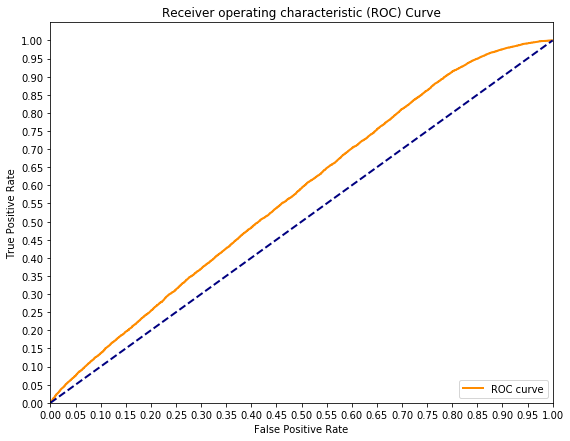

In [50]:
# AUC-ROC
y_score = logreg.fit(X_train, y_train).decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)

print('AUC:', round(auc(fpr, tpr),5))

plt.figure(figsize=(9,7))
lw = 2
plt.plot(
    fpr,
    tpr,
    color='darkorange',
    lw=lw,
    label='ROC curve'
    )
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Overall pretty poor performance!

### CrossValidation

In [51]:
def classification_report_with_accuracy_score(y_true, y_pred):
    print('Classication report from cross validation. Mean values:\n\n', classification_report(y_true, y_pred))
    return None

In [183]:
score_p = cross_val_score(
    logreg,
    X,
    y,
    cv=5,
    scoring='precision_weighted',
    #scoring=make_scorer(classification_report_with_accuracy_score)
)
score_r = cross_val_score(
    logreg,
    X,
    y,
    cv=5,
    scoring='recall_weighted',
    #scoring=make_scorer(classification_report_with_accuracy_score)
)
print(f'Average precision score {round(score_p.mean(), 2)}')
print(f'\nAverage recall score {round(score_r.mean(), 2)}')
print(f'\nAverage f1-score {(score_r.mean()*score_p.mean()*2)/(score_r.mean()+score_p.mean())}')

//anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Average precision score 0.55

Average recall score 0.59

Average f1-score 0.5714062069803862


Performance metrics are worse then without cross validation.F1 score is slightly improved. (by 0.03)

## Model 2: DecisionTree
A decision tree performs classifications by splitting the dataset and then evaluating the impurity of the different splits (e.g. by computing the Gini index), aiming to minimize the overall impurity. Decision trees usually work acceptably well but are bound to overfit the data.

In [185]:
treec = DecisionTreeClassifier(max_depth = 30)

In [186]:
treec.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=30,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [187]:
y_pred = treec.predict(X_test)

In [189]:
# Print the results
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))
print('\n\nClassification report: \n', classification_report(y_test, y_pred))

Confusion matrix: 
 [[11467  3502]
 [ 3348 15436]]


Classification report: 
               precision    recall  f1-score   support

           0       0.77      0.77      0.77     14969
           1       0.82      0.82      0.82     18784

    accuracy                           0.80     33753
   macro avg       0.79      0.79      0.79     33753
weighted avg       0.80      0.80      0.80     33753



### CrossValidation

In [191]:
start_time = time.time()

score_p = cross_val_score(
    treec,
    X,
    y,
    cv=5,
    scoring='precision_weighted',
    #scoring=make_scorer(classification_report_with_accuracy_score)
)
score_r = cross_val_score(
    treec,
    X,
    y,
    cv=5,
    scoring='recall_weighted',
    #scoring=make_scorer(classification_report_with_accuracy_score)
)
print(f'Average precision score {round(score_p.mean(), 2)}')
print(f'\nAverage recall score {round(score_r.mean(), 2)}')
print(f'\nAverage f1-score {(score_r.mean()*score_p.mean()*2)/(score_r.mean()+score_p.mean())}')

print(f'\n\n\nTime taken to run: {round((time.time() - start_time)/60, 1)} minutes')

Average precision score 0.8

Average recall score 0.8

Average f1-score 0.7973428087843745



Time taken to run: 0.3 minutes


Again, cross validation does not improve the scores of the model, the f1 even is even slightly worse than in not cross-validated version.

### Feature Importances

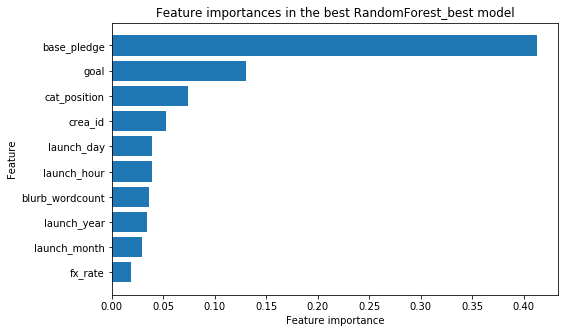

In [195]:
plot_feature_importances(
    treec.feature_importances_,
    X.columns,
    'DecisionTree_best',
    sort=True,
    top_count=10,
    fname='feat_imp_rf'
)

## Model 3: RandomForest
RandomForest is an ensemble method, which uses decision trees as base learners and significantly improves the the results. Firstly, through feature randomnes, meaning that not all n features are used to build the base estimator trees, but only a certain portion (typically $\sqrt(n)$) of them are randomly selected. Secondly, random forests perform bootstrap aggregating of data, which helps significantly lower the variance (overfitting) error, which is charasteric for decision trees.

A majority vote is taken from all the base estimators outputs, which then constitutes the final vote.

### Simple Model

In [9]:
from sklearn.ensemble import RandomForestClassifier

# Defining model and hyperparameters
rforest = RandomForestClassifier(max_depth=50, n_jobs=-1, n_estimators=10)

In [14]:
start_time = time.time()

rforest.fit(X_train, y_train)

print(f'Time taken to run: {round((time.time() - start_time)/60, 1)} minutes')

Time taken to run: 0.0 minutes


In [15]:
y_pred = rforest.predict(X_test)
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))
print('\n\nClassification report: \n', classification_report(y_test, y_pred))

Confusion matrix: 
 [[11805  3164]
 [ 2559 16225]]


Classification report: 
               precision    recall  f1-score   support

           0       0.82      0.79      0.80     14969
           1       0.84      0.86      0.85     18784

    accuracy                           0.83     33753
   macro avg       0.83      0.83      0.83     33753
weighted avg       0.83      0.83      0.83     33753



### Optimizing hyperparameters with GridSearch

In [16]:
params_rforest = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 50, 100, 150],
    'min_samples_leaf': [1, 5, 10, 15],
}

In [ ]:
start_time = time.time()

rforest_grid = RandomForestClassifier(n_jobs=-1)

grid_rforest = GridSearchCV(
    rforest_grid,
    param_grid=params_rforest,
    cv=5,
    n_jobs=-1,
    scoring='f1_weighted'
)

grid_rforest.fit(X_train, y_train)
print(f'Time taken to run: {round((time.time() - start_time)/60, 1)} minutes')
# 0.6m for len=3, cv=3; 5.1m for len=6, cv=3; 5.9m for len=6, cv=5; 2.8m for len=6, cv=3; XXX for len=9, cv=5;
# XXX for len=12, cv=5;

In [ ]:
for x in params_rforest.keys():
    print(f'Best value for hyperparamer {x}: {grid_rforest.best_params_[x]}')

### Calculate scores for best model

In [192]:
n_estimators = grid_rforest.best_params_['n_estimators']
max_depth = grid_rforest.best_params_['max_depth']
min_samples_leaf = grid_rforest.best_params_['min_samples_leaf']

#best_params = dict(zip(params_rforest.keys(), grid_rforest.best_params_))
rforest_best = RandomForestClassifier(**grid_rforest.best_params_)
rforest_best.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [193]:
y_pred = rforest_best.predict(X_test)
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))
print('\n\nClassification report: \n', classification_report(y_test, y_pred))

Confusion matrix: 
 [[10805  4164]
 [ 1040 17744]]


Classification report: 
               precision    recall  f1-score   support

           0       0.91      0.72      0.81     14969
           1       0.81      0.94      0.87     18784

    accuracy                           0.85     33753
   macro avg       0.86      0.83      0.84     33753
weighted avg       0.86      0.85      0.84     33753



### Feature Importances

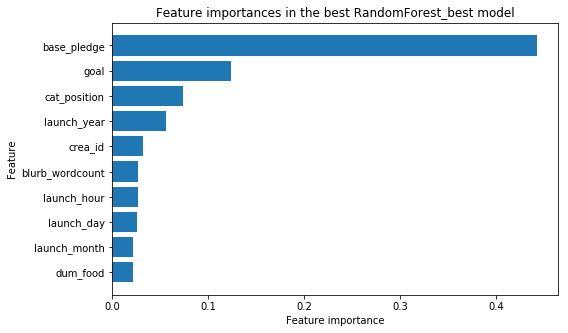

In [194]:
# Plot out the top10 most important features
plot_feature_importances(
    rforest_best.feature_importances_,
    X.columns,
    'RandomForest_best',
    sort=True,
    top_count=10,
    fname='feat_imp_rf-best'
)

1. 'base_pledge', 
2. 'goal',
3. 'cat_position',
4. 'launch_year'
5. 'crea_id',
6. 'blurb_wordcount',
7. 'launch_hour',
8. 'launch_day',
9. 'launch_month',  
10. 'dum_food'

## Model 4: XGBoost

XGBoost is an ensemble method from the class of boosting methods. Boosting methods generally work by combining multiple weak learners together and boosting their performance (hence the name), making the strong learners. Different base estimators / learners can be used, but here we will be using decision trees.

### Simple Model

In [130]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    learning_rate=0.1,
    max_depth=35,
    verbose=2,
    n_jobs=-1,
)

In [132]:
start_time = time.time()

xgb.fit(X_train, y_train)

print(f'Time taken to run: {round((time.time() - start_time)/60, 1)} minutes')

Time taken to run: 3.2 minutes


In [152]:
y_pred = xgb.predict(X_test)
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))
print('\n\nClassification report: \n', classification_report(y_test, y_pred))

Confusion matrix: 
 [[12036  2933]
 [ 1952 16832]]


Classification report: 
               precision    recall  f1-score   support

           0       0.86      0.80      0.83     14969
           1       0.85      0.90      0.87     18784

    accuracy                           0.86     33753
   macro avg       0.86      0.85      0.85     33753
weighted avg       0.86      0.86      0.85     33753



### Optimizing hyperparameters with GridSearch

In [197]:
params_xgboost = {
    'learning_rate': [0.01, 0.1, 1, 10, 100],
    'max_depth': [10, 40, 100],
    'n_estimators': [50, 100, 200],
}

params_xgboost = {
    'learning_rate': [0.01, 0.1, 0.5, 1, 10],
    'max_depth': [10, 35, 75, 100, 200],
    'n_estimators': [20, 50, 100, 200],
}

In [ ]:
start_time = time.time()

xgboost_grid = XGBClassifier(
    n_jobs=-1
)

grid_xgboost = GridSearchCV(
    xgboost_grid,
    param_grid=params_xgboost,
    cv=5,
    n_jobs=-1,
    scoring='f1_weighted'
)

grid_xgboost.fit(X_train, y_train)

print(f'Time taken to run: {round((time.time() - start_time)/60, 1)} minutes')
# 60.2 m len=7, cv=5;

### Calculate scores for best model

In [146]:
best_params = dict(zip(params_xgboost.keys(), grid_xgboost.best_params_))
grid_xgboost.best_params_

{'learning_rate': 1, 'max_depth': 100, 'n_estimators': 200}

In [ ]:
# Use the params obtained from GridSearch to build the best model
xgboost_best = XGBClassifier(**grid_xgboost.best_params_)
xgboost_best.fit(X_train, y_train)

In [150]:
y_pred = rforest_best.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10796  4173]
 [ 1084 17700]]
              precision    recall  f1-score   support

           0       0.91      0.72      0.80     14969
           1       0.81      0.94      0.87     18784

    accuracy                           0.84     33753
   macro avg       0.86      0.83      0.84     33753
weighted avg       0.85      0.84      0.84     33753



### Feature importances

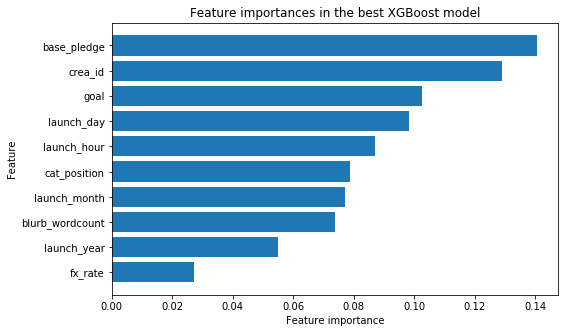

In [122]:
plot_feature_importances(
    xgboost_best.feature_importances_,
    X.columns 
    'XGBoost_best',
    sort=True,
    top_count=10,
    fname='feat_imp_xgboost'
)

In [ ]:
'base_pledge', 'crea_id', 'goal', 'launch_day', 'launch_hour', 'cat_position', 'launch_month', 'blurb_wordcount', 'launch_year', 'fx_rate'

In [ ]:
params_xgb2 = [ 
  {'n_estimators': [100, 200],
   'subsample': [0.7, 0.9],
   'min_child_weight': [100, 200]
  }
]

grid_xgb2 = GridSearchCV(estimator=xgb2, param_grid=params_xgb2, cv=5)

grid_xgb2.fit(X_train, y_train)

xgb_end2 = time.time()

xgb_best_score2 = grid_xgb2.best_score_
xgb_best_params2 = grid_xgb2.best_params_

print(f"Time taken to run: {round((xgb_end2 - xgb_start2)/60,1)} minutes")
print("Best accuracy:", round(xgb_best_score2,2))
print("Best parameters:", xgb_best_params2)

In [ ]:
from sklearn.model_selection import cross_val_score, RandomizedSearchCV

In [ ]:
cross_val_score(rforest,X,y, cv = 5)

array([0.73162504, 0.73345169, 0.73496079, 0.73596686, 0.74415577])

In [ ]:
cross_val_score(treec,X,y, cv = 5)

array([0.77319801, 0.78209794, 0.78227548, 0.79047196, 0.78655974])

In [ ]:
parameters = {'max_depth': list(range(31))}

randCV = RandomizedSearchCV(treec, parameters)

In [ ]:
randCV.fit(X_train, y_train)
y_pred = randCV.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

/Users/peterniksa/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[[13194  1566]
 [ 5863 13172]]
              precision    recall  f1-score   support

           0       0.69      0.89      0.78     14760
           1       0.89      0.69      0.78     19035

    accuracy                           0.78     33795
   macro avg       0.79      0.79      0.78     33795
weighted avg       0.81      0.78      0.78     33795



## Evaluation of models

Logistic Regression and DecisionTree are ignored
Both models achieved only very mediocre results, with the weighted f1-scores ranging from 0.52 to 0.72. KFold cross validation even made things worse

RandomForest without parameter tuning:
weighted f1-score: 0.83
calcuation time: 0:20 minutes

  precision    recall  f1-score   support

           0       0.82      0.79      0.80     14969
           1       0.84      0.86      0.85     18784

    accuracy                           0.83     33753
   macro avg       0.83      0.83      0.83     33753
weighted avg       0.83      0.83      0.83     33753

RandomForest with parameter tuning:
weighted f1-score: 0.84
calcuation time: 5:30 minutes

  precision    recall  f1-score   support

           0       0.91      0.72      0.80     14969
           1       0.81      0.94      0.87     18784

    accuracy                           0.84     33753
   macro avg       0.86      0.83      0.84     33753
weighted avg       0.85      0.84      0.84     33753

 



XGBoost without parameter optimization:
wighted f1-score: 0.85
calculation time: 5:12 minutes

          precision    recall  f1-score   support

           0       0.86      0.80      0.83     14969
           1       0.85      0.90      0.87     18784

    accuracy                           0.86     33753
   macro avg       0.86      0.85      0.85     33753
weighted avg       0.86      0.86      0.85     33753

  

## Final model
GridSearch optimized Random forest
with the following hyperparamters

n_estimators: 200
max_depth: 20
min_samples_leaf: 1

average f1 score: 0.84

In [10]:
n_estimators = 200
max_depth = 20
min_samples_leaf = 1

#best_params = dict(zip(params_rforest.keys(), grid_rforest.best_params_))
rforest_best = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_leaf=min_samples_leaf)
rforest_best.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [23]:
y_pred = rforest_best.predict(X_test)
f_cf = confusion_matrix(y_test, y_pred)
print(f_cf)
print()
round(f_cf[0][0]/sum(f_cf[0]),4)
print(f'If true value is fail, what proportion does model predict as faill: {round(f_cf[0][0]/sum(f_cf[0]),4)}')

print(f'If true value is success, what proportion does model predict as success: {round(f_cf[1][1]/sum(f_cf[1]),4)}')

If true value is fail, what proportion does model predict as faill: 0.7206
If true value is success, what proportion does model predict as success: 0.9421


In [21]:
f_cf[0][0]/sum(f_cf[0])

0.7206226200815018

# Recomendations

In [ ]:
Set “realistic” funding goals. Don’t overdo

Women are more successful, go female entrepreneurs!

Dance... or write a comic!


To be completed!

# Future Work

* Regression model for total pledged amount for a Kickstarter project

* Further data exploration, in particular picture analysis and impact

* Inclusion of Backer-Level data

* Temporal evolution of category success rate / count and gender participation

* Backer-count analysis
